In [94]:
import sys
import pdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import pickle
import datetime 
import os
import math
from matplotlib.pyplot import figure
from statistics import mode
import scipy
from scipy import stats
from scipy.signal import butter, lfilter, freqz
from numpy.fft import fft, ifft
import time
# import sleep_module
import glob
import skimage.io
import skimage.color
import skimage.filters
from os.path import exists
from numpy import concatenate, sort
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

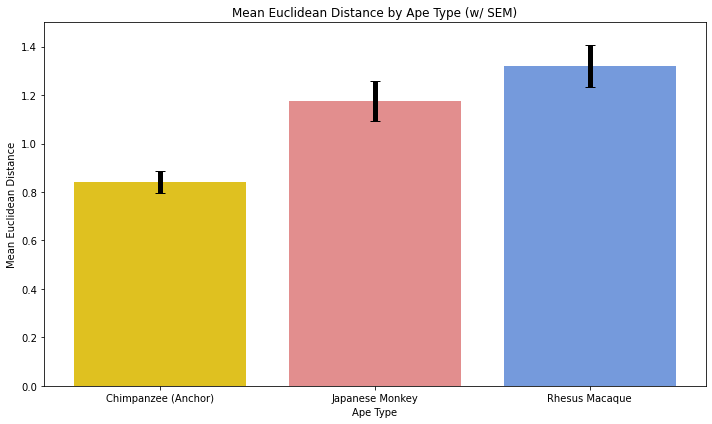

Chimpanzee vs Japanese Monkey: -3.5172920884660357 0.0008633154507542143
Chimpanzee vs Rhesus Macaque: -4.929759063223899 7.463368054808838e-06
Japanese Monkey vs Rhesus Macaque: -1.2115028941462302 0.2306156237544774


In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy import stats

# Custom colors for each bar

# new question
dat = pd.read_csv('ape_comparsion.csv', index_col=0)
dat['Ape Type'] = dat['image2'].str[0]
dat['Distance'] = dat['euclidean_distance']
# Directly apply the conversion without using a map or replace function in case of environmental constraints
dat['Ape Type'] = dat['Ape Type'].apply(lambda x: 'Rhesus Macaque' if x == 'r' else ('Chimpanzee (Anchor)' if x == 'c' else 'Japanese Monkey'))

dat
# Assuming q4 is already defined as per previous steps

# Calculate mean and standard error of the mean (SEM) for 'Distance' grouped by 'Valence'
grouped_data = dat.groupby('Ape Type')['Distance'].agg(['mean', 'std', 'count'])
grouped_data['sem'] = grouped_data['std'] / np.sqrt(grouped_data['count'])

# Reset index to use 'Valence' in plotting
grouped_data.reset_index(inplace=True)

# Replotting with corrected significance text and valid palette
plt.figure(figsize=(10, 6))
ape_colors = {'Chimpanzee (Anchor)': 'gold', 'Japanese Monkey': 'lightcoral', 'Rhesus Macaque': 'cornflowerblue'}
# Plotting the barplot with order and palette corrected
sns.barplot(data=grouped_data, x='Ape Type', y='mean', dodge=False, palette = ape_colors)
means = grouped_data['mean'].values
sems = grouped_data['sem'].values

# Correcting the data format for error bars plotting by using numpy arrays
plt.errorbar([0,1,2], y=means, yerr=sems,linestyle='None',color='k', linewidth = 5, capsize = 5)

plt.title('Mean Euclidean Distance by Ape Type (w/ SEM)')
plt.xlabel('Ape Type')
plt.ylabel('Mean Euclidean Distance')

plt.ylim(0,1.5)
plt.tight_layout()
plt.savefig('fig1_ape.pdf')
plt.show()



chimpanzee_distances = dat[dat['Ape Type'] == 'Chimpanzee (Anchor)']['Distance']
japanese_monkey_distances = dat[dat['Ape Type'] == 'Japanese Monkey']['Distance']
rhesus_macaque_distances = dat[dat['Ape Type'] == 'Rhesus Macaque']['Distance']

# 'Chimpanzee (Anchor)' vs 'Japanese Monkey'
t_stat, p_val = stats.ttest_ind(chimpanzee_distances, japanese_monkey_distances)
print("Chimpanzee vs Japanese Monkey:", t_stat, p_val)

# 'Chimpanzee (Anchor)' vs 'Rhesus Macaque'
t_stat, p_val = stats.ttest_ind(chimpanzee_distances, rhesus_macaque_distances)
print("Chimpanzee vs Rhesus Macaque:", t_stat, p_val)

# 'Japanese Monkey' vs 'Rhesus Macaque'
t_stat, p_val = stats.ttest_ind(japanese_monkey_distances, rhesus_macaque_distances)
print("Japanese Monkey vs Rhesus Macaque:", t_stat, p_val)


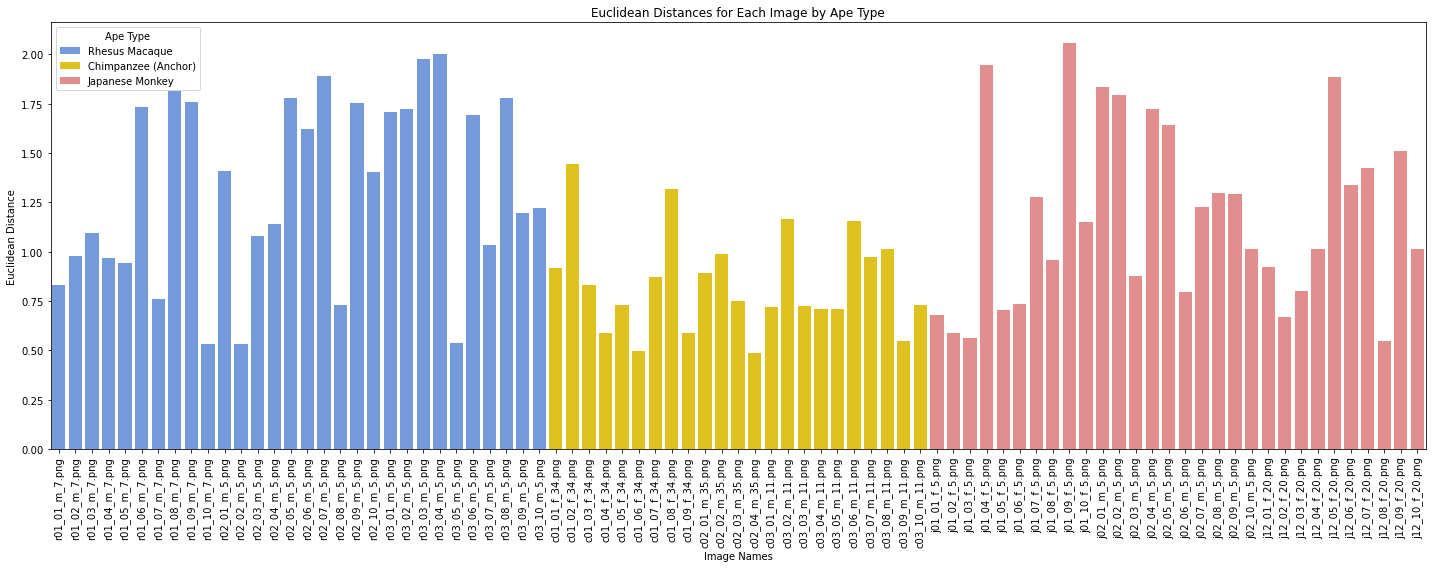

In [138]:
# Plotting all euclidean distances as bars with different colors for positive vs negative valence
plt.figure(figsize=(20, 8))
sns.barplot(data=dat, x='image2', y='Distance', hue='Ape Type', dodge=False, palette = ape_colors)
plt.xticks(rotation=90)
plt.title('Euclidean Distances for Each Image by Ape Type')
plt.xlabel('Image Names')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.savefig('fig2_ape.pdf')
plt.show()

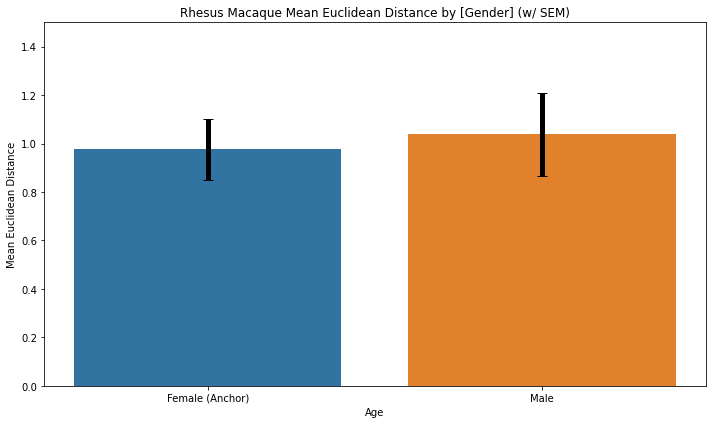

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy import stats
# new question
dat = pd.read_csv('rhesus_comparison.csv', index_col=0)
dat['Age'] = dat['image2'].str[-6:-4]
dat['Age'] = dat['Age'].apply(lambda x: '5 (Anchor)' if x == '_5' else 20)

#dat['Age'][10:28] = dat['image2'][10:28].str[-5:-4]
dat['Gender'] = dat['image2'].str[7]
dat['Gender'] = dat['Gender'].apply(lambda x: 'Female (Anchor)' if x == 'f' else 'Male')
dat['Distance'] = dat['euclidean_distance']

# # Assuming q4 is already defined as per previous steps
# Calculate mean and standard error of the mean (SEM) for 'Distance' grouped by 'Valence'
grouped_data = dat.groupby('Gender')['Distance'].agg(['mean', 'std', 'count'])
grouped_data['sem'] = grouped_data['std'] / np.sqrt(grouped_data['count'])

# Reset index to use 'Valence' in plotting
grouped_data.reset_index(inplace=True)

# Replotting with corrected significance text and valid palette
plt.figure(figsize=(10, 6))

# Plotting the barplot with order and palette corrected
sns.barplot(data=grouped_data, x='Gender', y='mean')
means = grouped_data['mean'].values
sems = grouped_data['sem'].values

# Correcting the data format for error bars plotting by using numpy arrays
plt.errorbar([0,1], y=means, yerr=sems,linestyle='None',color='k', linewidth = 5, capsize = 5)

plt.title('Rhesus Macaque Mean Euclidean Distance by [Gender] (w/ SEM)')
plt.xlabel('Age')
plt.ylabel('Mean Euclidean Distance')

plt.ylim(0,1.5)
plt.tight_layout()
plt.savefig('fig3_ape.pdf')
plt.show()


In [161]:
age_5 = dat[dat['Age'] == '5 (Anchor)']['Distance']
age_20 = dat[dat['Age'] == 20]['Distance']
t_stat, p_val = stats.ttest_ind(age_5, age_20)
print("Age 5 (Anchor) vs Age 20:", t_stat, p_val)


Age 5 (Anchor) vs Age 20: -0.9405662966717342 0.35526665660890233


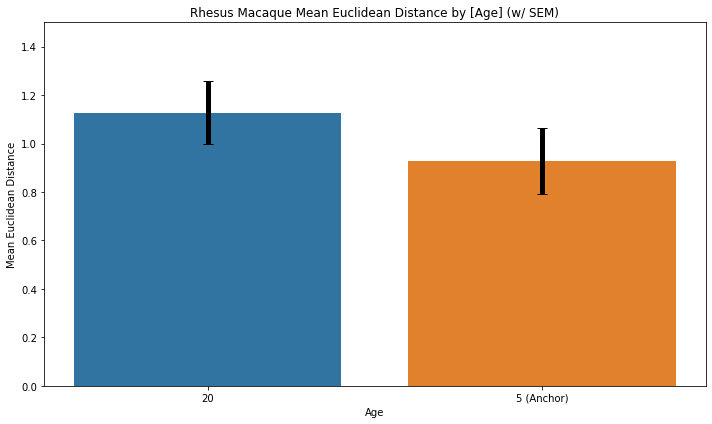

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy import stats

# # Assuming q4 is already defined as per previous steps
# Calculate mean and standard error of the mean (SEM) for 'Distance' grouped by 'Valence'
grouped_data = dat.groupby('Age')['Distance'].agg(['mean', 'std', 'count'])
grouped_data['sem'] = grouped_data['std'] / np.sqrt(grouped_data['count'])

# Reset index to use 'Valence' in plotting
grouped_data.reset_index(inplace=True)

# Replotting with corrected significance text and valid palette
plt.figure(figsize=(10, 6))

# Plotting the barplot with order and palette corrected
sns.barplot(data=grouped_data, x='Age', y='mean')
means = grouped_data['mean'].values
sems = grouped_data['sem'].values

# Correcting the data format for error bars plotting by using numpy arrays
plt.errorbar([0,1], y=means, yerr=sems,linestyle='None',color='k', linewidth = 5, capsize = 5)

plt.title('Rhesus Macaque Mean Euclidean Distance by [Age] (w/ SEM)')
plt.xlabel('Age')
plt.ylabel('Mean Euclidean Distance')

plt.ylim(0,1.5)
plt.tight_layout()
plt.savefig('fig4_ape.pdf')
plt.show()